In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn import metrics
import seaborn as sns


In [2]:
import spacy
nlp = spacy.load('pt')


df = pd.read_csv('../dados_categorizados_completo_novo.csv')
df.head()

,Id,Enunciado,Tópico,Contexto
0,994,Meu primeiro programa\nEscreva um programa que...,Ambientação,Outros
1,996,Impressão de caracteres na tela\nEscreva um pr...,Ambientação,Outros
2,999,Impressão de caracteres na tela (Bart Simpson)...,Ambientação,Outros
3,1000,Operadores aritméticos\nQual o valor de X para...,Ambientação,Matemático
4,578,Operadores aritméticos \nQual o valor de Y par...,Ambientação,Matemático


In [3]:
def get_new_sentences(da,maximum,synonyms_lexicon):
    strings=[]
    for elemento in da['Enunciado']:
        if(len(da)+len(strings)<maximum):
            contador=0
            lista=elemento.split()
            while(contador<len(lista)):
                if(lista[contador] in synonyms_lexicon):
                    lista[contador]=synonyms_lexicon[lista[contador]][0]
                contador+=1
            strings+=[' '.join(lista)]
        else:
            break

    new_sentences = pd.Series(strings)
    return new_sentences

def get_synonyms_lexicon(path):
    synonyms_lexicon = {}
    text_entries = [l.strip() for l in open(path).readlines()]
    for e in text_entries:
        e = e.split(' ')
        k = e[0]
        v = e[1:len(e)]
        synonyms_lexicon[k] = v
    return synonyms_lexicon

synonyms_lexicon = get_synonyms_lexicon('../paráfrase/arq3.txt')

In [4]:
maximum = df.Tópico.value_counts().max()

# Separação de cada problemas em suas respectivas classes
g = df.groupby('Tópico')

ece = g.get_group('Estrutura condicional encadeada')
#     ec=g.get_group('Estrutura condicional')
vetor = g.get_group('Vetor')
ves = g.get_group('Variáveis e Estrutura Sequencial')
ecc = g.get_group('Estrutura condicional composta')
matrizes = g.get_group('Matrizes')
ercont = g.get_group('Estrutura de repetição por contagem')
ercond = g.get_group('Estrutura de repetição por condição')
strings = g.get_group('Strings')
ambientacao = g.get_group('Ambientação')

#criação de novas sentenças

new_ece = get_new_sentences(ece,maximum,synonyms_lexicon)
new_vetor = get_new_sentences(vetor,maximum,synonyms_lexicon)
new_ves = get_new_sentences(ves,maximum,synonyms_lexicon)
new_ecc = get_new_sentences(ecc,maximum,synonyms_lexicon)
new_matrizes = get_new_sentences(matrizes,maximum,synonyms_lexicon)
new_ercond = get_new_sentences(ercond,maximum,synonyms_lexicon)
new_ercont = get_new_sentences(ercont,maximum,synonyms_lexicon)
new_strings = get_new_sentences(strings,maximum,synonyms_lexicon)
new_ambientacao = get_new_sentences(ambientacao,maximum,synonyms_lexicon)


#criando dataframe de cada sentença criada

new_ece = pd.DataFrame(new_ece,columns=['Enunciado'])
new_ece['Tópico'] = 'Estrutura condicional'
new_ece['Contexto'] = 'Nada'


new_vetor = pd.DataFrame(new_vetor,columns=['Enunciado'])
new_vetor['Tópico'] = 'Vetor'
new_vetor['Contexto'] = 'Nada'


new_ves = pd.DataFrame(new_ves,columns=['Enunciado'])
new_ves['Tópico'] = 'Variáveis e Estrutura Sequencial'
new_ves['Contexto'] = 'Nada'


new_ecc = pd.DataFrame(new_ecc,columns=['Enunciado'])
new_ecc['Tópico'] = 'Estrutura condicional composta'
new_ecc['Contexto'] = 'Nada'


new_matrizes = pd.DataFrame(new_matrizes,columns=['Enunciado'])
new_matrizes['Tópico'] = 'Matrizes'
new_matrizes['Contexto'] = 'Nada'


new_ercont = pd.DataFrame(new_ercont,columns=['Enunciado'])
new_ercont['Tópico'] = 'Estrutura de repetição por contagem'
new_ercont['Contexto'] = 'Nada'


new_ercond = pd.DataFrame(new_ercond,columns=['Enunciado'])
new_ercond['Tópico'] = 'Estrutura de repetição por condição'
new_ercond['Contexto'] = 'Nada'


new_strings = pd.DataFrame(new_strings,columns=['Enunciado'])
new_strings['Tópico'] = 'Strings'
new_strings['Contexto'] = 'Nada'


new_ambientacao = pd.DataFrame(new_ambientacao,columns=['Enunciado'])
new_ambientacao['Tópico'] = 'Ambientação'
new_ambientacao['Contexto'] = 'Nada'


ece_extended = pd.concat([ece, new_ece], keys = ['Enunciado', 'Tópico'])
vetor_extended = pd.concat([vetor, new_vetor], keys = ['Enunciado', 'Tópico'])
ves_extended = pd.concat([ves, new_ves], keys = ['Enunciado', 'Tópico'])
ecc_extended = pd.concat([ecc, new_ecc], keys = ['Enunciado', 'Tópico'])
matrizes_extended = pd.concat([matrizes, new_matrizes], keys = ['Enunciado', 'Tópico'])
ercont_extended = pd.concat([ercont, new_ercont], keys = ['Enunciado', 'Tópico'])
ercond_extended = pd.concat([ercond, new_ercond], keys = ['Enunciado', 'Tópico'])
strings_extended = pd.concat([strings, new_strings], keys = ['Enunciado', 'Tópico'])
ambientacao_extended = pd.concat([ambientacao, new_ambientacao], keys = ['Enunciado', 'Tópico'])

#concantenando dataframes de sentenças parafráseadas a base de dados original 
df = pd.concat([ece_extended,vetor_extended,ves_extended,ecc_extended,
           matrizes_extended,ercont_extended,ercond_extended,strings_extended,ambientacao_extended])

/home/samuel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/home/samuel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/home/samuel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'so

In [5]:
df.Tópico.value_counts()

Estrutura de repetição por contagem    161
Variáveis e Estrutura Sequencial       161
Vetor                                  161
Estrutura condicional encadeada        161
Estrutura condicional composta         161
Matrizes                               161
Estrutura de repetição por condição    161
Strings                                 94
Ambientação                             38
Name: Tópico, dtype: int64

In [6]:
def n_grams(sentence):
    return sentence.split()
master=[]
for elemento in df['Enunciado']:
    doc=nlp(elemento)
    lista=[]
    for token in doc:
        if(token.text not in nlp.Defaults.stop_words and token.lemma_ not in nlp.Defaults.stop_words and token.text.isalpha() and len(token.text)>1):
            lista+=[token.lemma_]
    master+=[lista]

In [7]:
df['tokens']=master

In [8]:
from gensim.models import Word2Vec

In [9]:
model = Word2Vec(min_count=10,
                     window=10,
                     size=20,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=4,
                     sg=0,
                     hs=1)

In [10]:
model.build_vocab(sentences=df.tokens)
# model.train(df.tokens, total_examples=model.corpus_count, epochs=30, report_delay=1)

In [11]:
# model.save("w2v.model")
# print("Model Saved")

In [12]:
# max_epochs = 100

# for epoch in range(max_epochs):
#     model.train(df.tokens,
#                 total_examples=model.corpus_count,
#                 epochs=model.iter)
#     # decrease the learning rate
#     model.alpha -= 0.0002
#     # fix the learning rate, no decay
#     model.min_alpha = model.alpha

In [13]:
# model.init_sims(replace=True)
# X = model[model.wv.vocab]

In [14]:
# import umap
# import matplotlib.pyplot as plt
# %matplotlib inline

# cluster_embedding = umap.UMAP(n_neighbors=10, min_dist=0.0,
#                               n_components=2, random_state=42).fit_transform(X)

# plt.figure(figsize=(10,9))
# plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

In [15]:
vocab=[]
words=[]
for i in df.tokens:
    for j in i:
        try:
            vocab.append(model.wv.word_vec(j))
            if(j not in words):
                words+=[j]
        except:
            continue

In [16]:
len(words)
teste=[a*0 for a in range(0,len(words))]

In [17]:
def procura(palavra,lista):
    contador=0
    while(len(lista)>contador):
        if(lista[contador]==palavra):
            return contador
        contador+=1
    return -1

In [18]:
from numpy import linalg as LA
vectors=[]
vec=[]
for elemento in df.tokens:
    for palavra in elemento:
        indice=procura(palavra,words)
        if(indice>-1):
            vec=[]
            vec.append(model.wv.word_vec(palavra))
            for cada in vec:
                teste[indice]=LA.norm(cada, -2)
    vectors.append(teste)
    teste=[a*0 for a in range(0,len(words))]

In [19]:
# vec = []
# vectors = []

# for i in df.tokens:
#     for j in i:
#         try:
#             vec.append(model.wv.word_vec(j))
#         except:
#             continue
#     vectors.append(vec)
#     vec = []

In [20]:
# tam = 0

# for i in range(0, len(vectors)):
#     if(tam < len(vectors[i])):
#         tam = len(vectors[i])

In [21]:
# zeros = np.zeros(1)
# zeros

In [22]:
# for i in range(0, len(vectors)):
#     while(len(vectors[i]) < tam):
#         vectors[i].append(zeros)

In [23]:
# from numpy import linalg as LA

# vec = []
# vectors_norm = []

# for i in vectors:
#     for j in i:
#         vec.append(LA.norm(j, -2))
#     vectors_norm.append(vec)
#     vec = []

In [24]:
# from sklearn.decomposition import TruncatedSVD

# svd = TruncatedSVD(algorithm='randomized', n_components=100)
# senteces = svd.fit_transform(vectors_norm)

In [25]:
X=vectors
y=df['Tópico'].values

In [26]:
topico=[]
for elemento in df['Contexto']:
    topico+=[elemento]

In [27]:
contador=0
X_novo=[]
y_novo=[]
while(contador<len(X)):
    if(topico[contador]!='Nada'):
        X_novo+=[X[contador]]
        y_novo+=[y[contador]]
    contador+=1

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
pipeline = RandomForestClassifier(class_weight="balanced_subsample",random_state=42)
# pipeline=LinearSVC()

In [29]:
X=X_novo
y=y_novo
from sklearn.model_selection import cross_val_predict
y_pred=cross_val_predict(pipeline,X,y,cv=10)

In [30]:
print(metrics.confusion_matrix(y,y_pred))

[[ 18   0   0   1   0   0   0   0   0]
 [  1  89  11   0   0   0   0  34   1]
 [  0  10 134   0   0  10   0   7   0]
 [  2  16   0  75   6   0   0  15   0]
 [  0   1   0   4  89   1   5   1  16]
 [  0   0   2   0   0 126   4   1   1]
 [  0   2   1   1   2   0  40   1   0]
 [  1  11   1   7   1   1   0 134   1]
 [  0   2   0   0   6   0   0   0 152]]


In [31]:
print(metrics.classification_report(y,y_pred))

                                     precision    recall  f1-score   support

                        Ambientação       0.82      0.95      0.88        19
     Estrutura condicional composta       0.68      0.65      0.67       136
    Estrutura condicional encadeada       0.90      0.83      0.86       161
Estrutura de repetição por condição       0.85      0.66      0.74       114
Estrutura de repetição por contagem       0.86      0.76      0.81       117
                           Matrizes       0.91      0.94      0.93       134
                            Strings       0.82      0.85      0.83        47
   Variáveis e Estrutura Sequencial       0.69      0.85      0.77       157
                              Vetor       0.89      0.95      0.92       160

                           accuracy                           0.82      1045
                          macro avg       0.82      0.83      0.82      1045
                       weighted avg       0.82      0.82      0.82      10

In [32]:
print(metrics.accuracy_score(y,y_pred))

0.8200956937799043


In [33]:
from sklearn.metrics import confusion_matrix

mat_etc = confusion_matrix(y, y_pred)
row_sums = mat_etc.sum(axis=1, keepdims=True)

In [34]:
norm_conf_mx = mat_etc / row_sums

In [35]:
labels = ['Ambientação','Estrutura condicional composta','Estrutura condicional encadeada'
          ,'Estrutura de repetição por condição','Estrutura de repetição por contagem','Matrizes'
          ,'Strings','Variáveis e Estrutura Sequencial','Vetor']

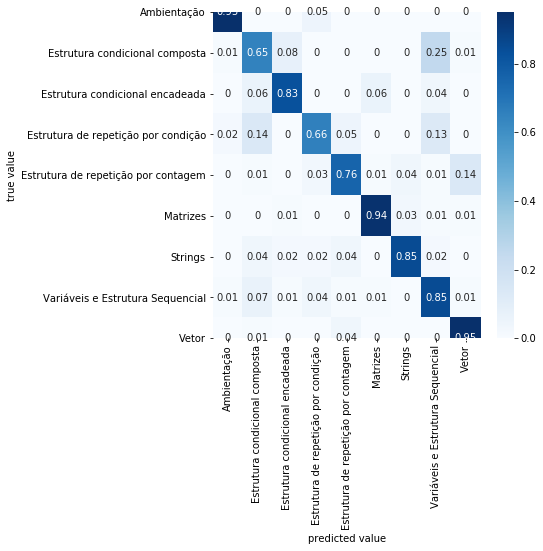

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(pd.DataFrame(norm_conf_mx.round(2),
                         columns=labels, 
                         index=labels), 
            annot=True, 
            fmt='g', 
            cmap='Blues')
plt.xlabel('predicted value')
plt.ylabel('true value');